In [1]:
with open('/kaggle/input/aoc-18-1-fh/aoc_18_input.txt', 'r') as file:
    # Read the lines and store them in an array
    digplan = file.readlines()
digplan = [s.rstrip('\n') for s in digplan]

In [2]:
dplan = []
for d in digplan:
    s = d.split(' ')
    dp = {'direction': s[0], 'number': int(s[1]), 'HEX': s[2]}
    dplan.append(dp)

In [3]:
def create_loop(directions, lengths):
    size = max(sum(lengths), 1000)  # Adjust the size if needed
    array = [['.'] * size for _ in range(size)]

    x, y = 500, 500
    #x, y = 10, 10
    for i in range(len(directions)):
        for _ in range(lengths[i]):
            if(directions[i] == 'R'):
                x += 1
            elif(directions[i] == 'L'):
                x -= 1
            elif(directions[i] == 'U'):
                y -= 1
            elif(directions[i] == 'D'):
                y += 1
            array[y][x] = '#'
          
    rows_to_remove = [row for row in range(len(array)) if all(val == '.' for val in array[row])]
    cols_to_remove = [col for col in range(len(array[0])) if all(array[row][col] == '.' for row in range(len(array)))]
    # Remove rows and columns containing only '.'
    new_array = [
        [array[row][col] for col in range(len(array[0])) if col not in cols_to_remove]
        for row in range(len(array)) if row not in rows_to_remove
    ]
    return new_array

In [4]:
def positions_of_hashes(array):
    positions_dict = {}

    for i, row in enumerate(array):
        for j, char in enumerate(row):
            if char == '#' or char == '+':
                if '#' not in positions_dict:
                    positions_dict['#'] = [(i, j)]
                else:
                    positions_dict['#'].append((i, j))

    return positions_dict

In [5]:
def replace_char(matrix, target_char, replacement_char):
    for row_idx, row in enumerate(matrix):
        for col_idx, char in enumerate(row):
            if char == target_char:
                matrix[row_idx][col_idx] = replacement_char

In [6]:
resulting_array = create_loop([item['direction'] for item in dplan], [item['number'] for item in dplan])

In [7]:
pre_char = '.'
chain = False
for i in range(len(resulting_array)-1):
    ups = 0
    for j in range(len(resulting_array[i])-1):
        if resulting_array[i][j] == '#':
            dir_last = resulting_array[i+1][j]
            if(prechar == '#' and chain == False):
                chain = True
                dir_first = resulting_array[i+1][j-1]
            if(resulting_array[i][j+1] != '#'):
                if(chain):
                    if(dir_first != dir_last):
                        ups += 1
                else:
                    ups += 1
            prechar = '#'
            continue
        else:
            prechar = '.'
            chain = False
        if ups % 2 == 0:
            resulting_array[i][j] = "."
        else:
            resulting_array[i][j] = "I"

In [8]:
inside_count = "\n".join(["".join(line) for line in resulting_array]).count("I")
border_count = "\n".join(["".join(line) for line in resulting_array]).count("#")
border_count += "\n".join(["".join(line) for line in resulting_array]).count("+")

print('Inner area:', inside_count)
print('Border:', border_count)
print('Total:', inside_count+border_count)

Inner area: 32643
Border: 3348
Total: 35991


# **PART 2**

In [9]:
inp = open('/kaggle/input/aoc-18-1-fh/aoc_18_input.txt')
dat = inp.read().strip()

pos = (0, 0)
sum1 = 0
sum2 = 0
sum_dir = 0

pos_corr = (0, 0)
sum1_corr = 0
sum2_corr = 0
sum_dir_corr = 0

for l in dat.split("\n"):
    d, n, col = l.split()
    match d:
        case "L":
            direction = (-1, 0)
        case "R":
            direction = (1, 0)
        case "U":
            direction = (0, -1)
        case "D":
            direction = (0, 1)
    length = int(n)
    next_pos = (pos[0] + direction[0] * length, pos[1] + direction[1] * length)
    sum1 = sum1 + (pos[0]) * (next_pos[1])
    sum2 = sum2 + (pos[1]) * (next_pos[0])
    sum_dir += length
    pos = next_pos
    cleaned = col.removeprefix("(#").removesuffix(")")
    corr_len = int(cleaned[:5], base=16)
    match cleaned[5]:
        case "0":
            direction_corr = (1, 0)
        case "1":
            direction_corr = (0, 1)
        case "2":
            direction_corr = (-1, 0)
        case "3":
            direction_corr = (0, -1)
    next_pos_corr = (pos_corr[0] + direction_corr[0] * corr_len, pos_corr[1] + direction_corr[1] * corr_len)
    sum1_corr = sum1_corr + (pos_corr[0]) * (next_pos_corr[1])
    sum2_corr = sum2_corr + (pos_corr[1]) * (next_pos_corr[0])
    sum_dir_corr += corr_len
    pos_corr = next_pos_corr

area = abs(sum1 - sum2) / 2
print(area + sum_dir / 2 + 1)


area_corr = abs(sum1_corr - sum2_corr) / 2
print(area_corr + sum_dir_corr / 2 + 1)

35991.0
54058824661845.0


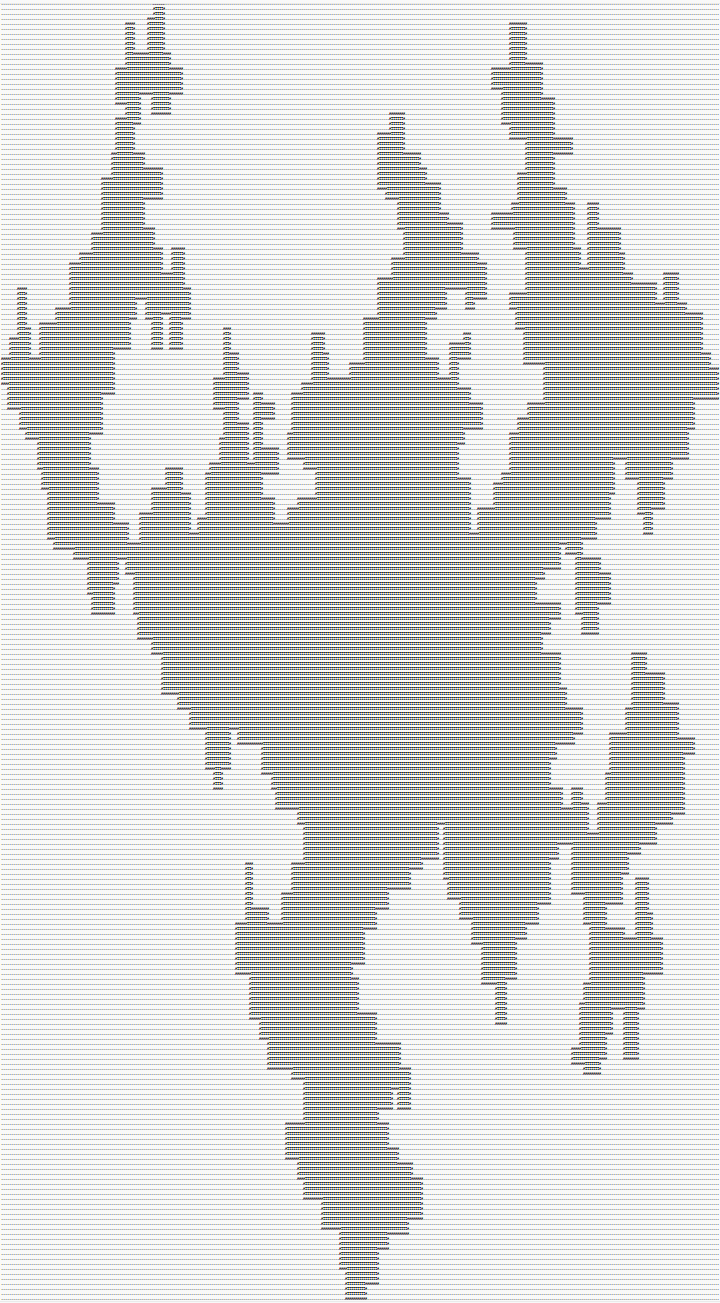
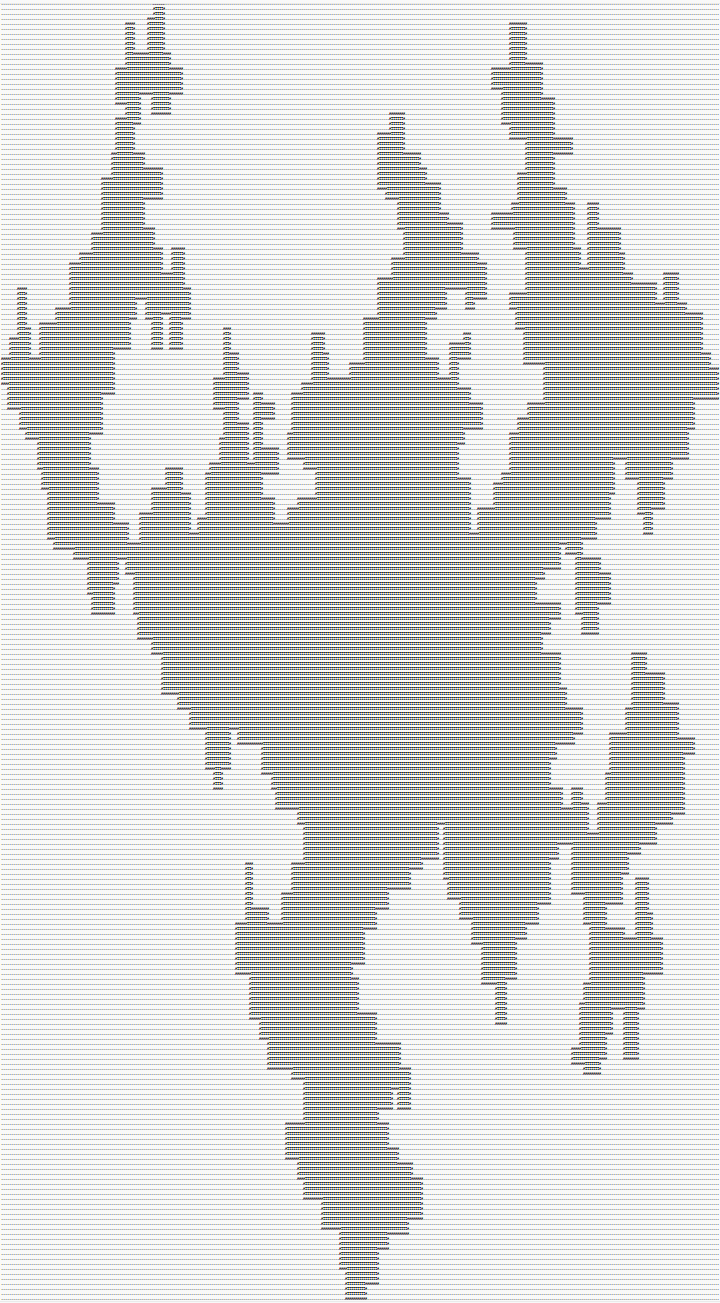